# 1. Introducción y generalidades

El algoritmo de **Random Forest**, o **Bosque Aleatorio**, es un método de aprendizaje automático supervisado que se utiliza comúnmente para resolver problemas de clasificación y regresión. Fue registrado por Leo Breiman y Adele Cutler. Este algoritmo es popular debido a su facilidad de uso y flexibilidad.

El algoritmo de Random Forest se basa en la combinación de la salida de múltiples árboles de decisión para alcanzar un solo resultado. Cada uno de estos árboles de decisión se genera a partir de diferentes muestras del conjunto de datos.

Los **árboles de decisión** son algoritmos comunes de aprendizaje supervisado que comienzan con una pregunta básica y, a partir de ahí, hacen una serie de preguntas para determinar una respuesta. Estas preguntas constituyen los nodos de decisión en el árbol, actuando como un medio para dividir los datos.

Aunque los árboles de decisión son útiles, pueden ser propensos a problemas como sesgos y sobreajuste. Sin embargo, cuando varios árboles de decisión forman un conjunto en el algoritmo de Random Forest, predicen resultados más precisos, especialmente cuando los árboles individuales no están correlacionados entre sí.


# 2. Cómo funciona y en qué se basa

El algoritmo de Random Forest funciona a través de una serie de pasos:

1. **Selección de muestras**: El algoritmo selecciona aleatoriamente "n" números de registros del conjunto de datos.
2. **Construcción de árboles de decisión**: Se construyen árboles de decisión individuales para cada muestra. Cada árbol de decisión se genera a partir de diferentes muestras del conjunto de datos.
3. **Predicción**: Cada árbol de decisión generará una salida. La salida final depende de la mayoría o el promedio para la clasificación y la regresión, respectivamente.

El algoritmo Random Forest se basa en la combinación de la salida de múltiples árboles de decisión para alcanzar un solo resultado. Este método se conoce como un método de conjunto (o ensemble method, en inglés), es decir, que combina resultados para obtener un superresultado final.

Cada árbol en el bosque aleatorio se construye a partir de una muestra extraída con reemplazo (es decir, una muestra bootstrap) del conjunto de datos de entrenamiento. Además, al construir cada árbol, cada vez que se considera una división, un subconjunto aleatorio de las características se elige como candidatos divididos. Esto introduce más variabilidad entre los árboles en el modelo y, en última instancia, resulta en un modelo más robusto.



# 3. Fundamentos matemáticos del algoritmo

El algoritmo de Random Forest se basa en dos conceptos matemáticos fundamentales: **árboles de decisión** y **ensamblado**.

#### Árboles de decisión

Un árbol de decisión es una estructura de flujo que toma un conjunto de entradas y las divide en ramas, cada una representando una decisión basada en una característica. Cada división es un nodo, y el nodo final sin divisiones se llama nodo hoja, que proporciona la salida o la decisión.

La creación de un árbol de decisión implica seleccionar las características que dividen el conjunto de datos de la mejor manera posible. Esto se hace utilizando medidas como la **ganancia de información**, que se basa en la **entropía** (una medida de la impureza en un subconjunto de datos).

La ganancia de información se calcula como:

$$
\text{Ganancia}(S, A) = \text{Entropía}(S) - \sum_{v \in \text{Valores}(A)}\left(\frac{|S_v|}{|S|}\right) \times \text{Entropía}(S_v)
$$

donde:
- $S$ es el conjunto de datos.
- $A$ es un atributo o característica.
- $\text{Valores}(A)$ son los valores posibles para la característica.
- $S_v$ es el subconjunto de $S$ para el cual la característica $A$ tiene valor $v$.

Las fórmulas principales utilizadas en la construcción de un árbol de decisión son las siguientes:

1. **Entropía**: La entropía es una medida de la impureza o desorden en un conjunto de datos. Se utiliza para calcular la homogeneidad de las muestras en un nodo. La fórmula para calcular la entropía es:

    $$
    \text{Entropía}(S) = - \sum p_i \log_2 p_i
    $$

    donde $p_i$ es la proporción de las instancias que pertenecen a la clase $i$.


2. **Índice Gini**: El índice Gini es otra medida de impureza o desorden utilizada en el algoritmo CART (Classification and Regression Trees). Es una alternativa a la entropía y se calcula como:

    $$
    \text{Gini}(S) = 1 - \sum (p_i)^2
    $$

    donde $p_i$ es la proporción de las instancias que pertenecen a la clase $i$.

Estas fórmulas se utilizan iterativamente para construir el árbol, seleccionando en cada paso el atributo que maximiza la ganancia de información (o minimiza el índice Gini en el caso del algoritmo CART) y dividiendo el conjunto de datos según los valores de ese atributo.

#### Ensamblado

El ensamblado es una técnica que combina las predicciones de múltiples modelos para obtener una predicción final más precisa y robusta. En el caso del Random Forest, el ensamblado se realiza utilizando el método de **bagging**.

El bagging implica generar múltiples conjuntos de datos a partir del conjunto original mediante muestreo con reemplazo (cada conjunto tiene el mismo tamaño que el original, pero algunas instancias pueden aparecer varias veces y otras no aparecer) llamado boostraping. Luego, se entrena un árbol de decisión en cada conjunto.

La predicción final del Random Forest se obtiene realizando una votación entre las predicciones de todos los árboles. En problemas de clasificación, la clase con más votos es la predicción final; en problemas de regresión, la media (o mediana) de las predicciones es la salida final.

Estos fundamentos matemáticos permiten al algoritmo Random Forest manejar eficazmente tanto problemas lineales como no lineales, con alta dimensionalidad y con posibles interacciones entre características. Además, gracias a su naturaleza ensamblada, este algoritmo es menos propenso al sobreajuste que un único árbol de decisión.



# 4. Sintaxis del código

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


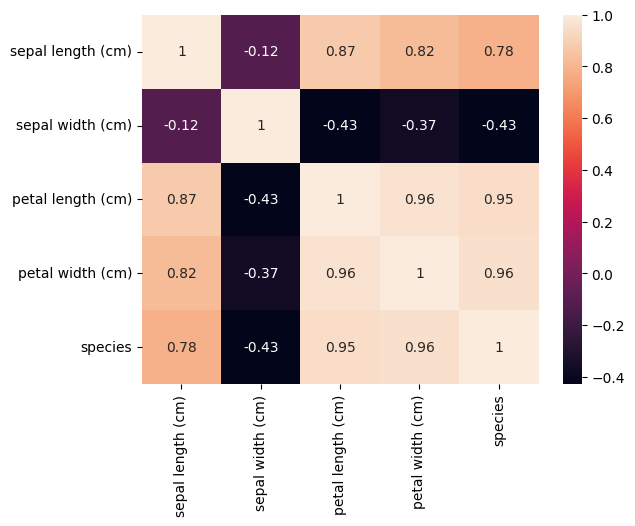

Precisión: 0.9555555555555556


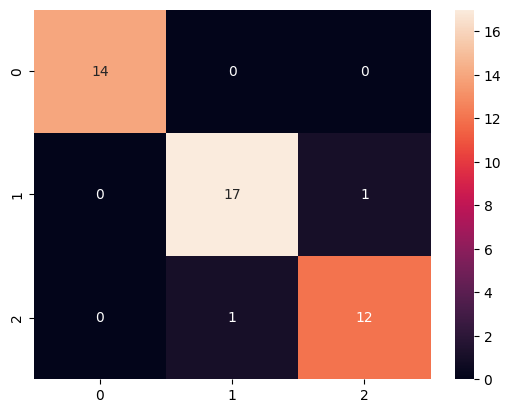

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el conjunto de datos iris como ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Crear un DataFrame para facilitar la visualización y el análisis de los datos
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Visualizar las primeras filas del DataFrame
print(df.head())

# Crear una matriz de correlación
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear un clasificador gaussiano
clf = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo usando los conjuntos de entrenamiento y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

# Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?
print("Precisión:", accuracy_score(y_test, y_pred))

# Crear una matriz de confusión para evaluar la precisión del modelo
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

Qué hace cada parte del código:

- **Importar las bibliotecas necesarias**: Este código importa las bibliotecas necesarias para crear un clasificador de bosques aleatorios, cargar un conjunto de datos, dividirlo en conjuntos de entrenamiento y prueba, y calcular la precisión del modelo.

- **Cargar el conjunto de datos iris como ejemplo**: El conjunto de datos iris es un conjunto de datos simple y comúnmente utilizado en el aprendizaje automático. Contiene mediciones de 150 flores de iris de tres especies diferentes.

- **Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba**: Este código divide el conjunto de datos en un conjunto de entrenamiento (70% de los datos) y un conjunto de prueba (30% de los datos). El parámetro `random_state` se utiliza para inicializar el generador interno de números aleatorios, que decidirá la división de los datos en índices de entrenamiento y prueba.

- **Crear un clasificador gaussiano**: Esta línea crea un nuevo RandomForestClassifier. El parámetro `n_estimators` especifica el número de árboles en el bosque del modelo.

- **Entrenar el modelo usando los conjuntos de entrenamiento**: La función `fit` se utiliza para entrenar el modelo con los datos de entrenamiento.

- **Predecir la respuesta para el conjunto de datos de prueba**: La función `predict` se utiliza para predecir las respuestas para los datos de prueba.

- **Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?**: Finalmente, calculamos e imprimimos la precisión de nuestro modelo comparando nuestros valores predichos para el conjunto de prueba (`y_pred`) con sus valores reales (`y_test`).

- **DataFrame**: Creamos un DataFrame con nuestros datos para facilitar su visualización y análisis.

- **Matriz de correlación**: Creamos una matriz de correlación para ver las relaciones entre las diferentes características. Esto puede ser útil para entender nuestros datos y cómo se relacionan entre sí.

- **Visualización**: Usamos la biblioteca `seaborn` para visualizar nuestras matrices.

- **Matriz de confusión**: Creamos una matriz de confusión después de hacer nuestras predicciones. Esto nos da una idea más clara de dónde nuestro modelo está acertando y dónde está fallando.

# 5. Pros y contras, cuándo usarlo y cuándo no

#### Pros

1. **Manejo de datos de alta dimensión**: Random Forest puede manejar eficazmente conjuntos de datos con un gran número de características y observaciones.
2. **Robustez a los valores atípicos**: Debido a la naturaleza del ensamblado y el muestreo, Random Forest es bastante robusto a los valores atípicos en los datos.
3. **Menos preprocesamiento de datos**: No es necesario normalizar o escalar las características para Random Forest, lo que reduce la necesidad de preprocesamiento de datos.
4. **Manejo de características no lineales e interacciones**: Random Forest puede capturar interacciones no lineales entre características, lo que puede ser difícil para otros algoritmos.
5. **Estimaciones de importancia de características**: Random Forest proporciona una estimación directa de qué características son las más importantes en la predicción.

#### Contras

1. **Tiempo de entrenamiento**: Random Forest puede ser lento para entrenar si el número de árboles es grande.
2. **Complejidad del modelo**: Un Random Forest puede ser un modelo complejo de entender e interpretar, en comparación con un árbol de decisión simple.
3. **Predicciones fuera del rango**: En problemas de regresión, Random Forest no puede predecir más allá del rango de las observaciones en el conjunto de entrenamiento.

#### Cuándo usarlo

Random Forest es una buena opción cuando tienes un conjunto de datos con características categóricas o numéricas, y estás buscando un algoritmo que pueda manejar interacciones no lineales y que sea robusto a los valores atípicos.

#### Cuándo no usarlo

Es posible que no quieras usar Random Forest si necesitas un modelo muy rápido y eficiente en términos de tiempo de entrenamiento y predicción, o si necesitas hacer predicciones fuera del rango de tu conjunto de entrenamiento en problemas de regresión. También puede que no sea la mejor opción si necesitas un modelo muy interpretable.

## Ejercicio dataset IBM

Se calculará la ganancia del atributo Wind

In [6]:
import numpy as np
entropia = -(4/7) * np.log2(4/7) - (3/7) * np.log2(3/7)

In [7]:
#entropía wind weak
entropia_weak = -(1/5) * np.log2(1/5) - (4/5) * np.log2(4/5)

In [8]:
#entropía wind strong
entropia_strong = -(2/2) * np.log2(2/2)

In [10]:
#ganancia
entropia - ((5/7)*entropia_weak + (2/7)*entropia_strong)

0.46956521111470695